# Introduction to Regression with Neural Networks in TensorFlow

There are many defintion for a regression problem but in our case, we're going to simplify it. Predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2022-11-07 11:34:14.705481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


## Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

8
8


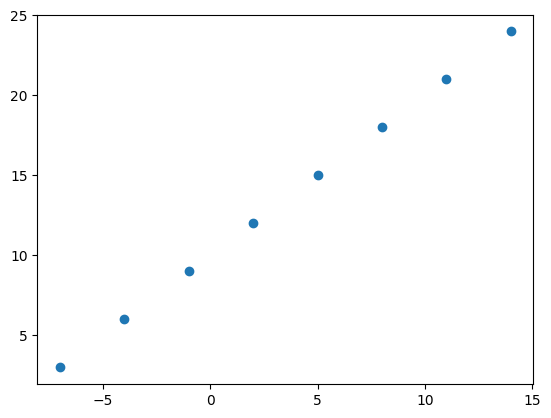

In [4]:
# Creating features
X = np.array([-7,-4,-1,2,5,8,11,14])

# Create labels
y = np.array([3,6,9,12,15,18,21,24])

# Visualize it
print(len(X))
print(len(y))

# Visualise
plt.scatter(X,y);

In [5]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

2022-11-05 22:26:39.691967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [8]:
X[0],y[0]

(-7, 3)

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape
X.shape

TensorShape([8])

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [12]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential 

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential()
## Adding first layer
model.add(tf.keras.layers.Dense(100))



# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,# mae is short for mean absolute error
             optimizer = "sgd",# SGD is short for stochastic gradient desent
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5);

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 13.5230 - mae: 13.5230
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 13.5216 - mae: 13.5216
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 13.5203 - mae: 13.5203
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 13.5190 - mae: 13.5190
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 13.5177 - mae: 13.5177


In [ ]:
y_pred =  model.predict([8.0])
y_pred

## Improving our model

We can improve our model, by altering the steps we took to create a model.


## Steps in modelling withe Tensor Flow

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [29]:
## Improving the model

# 1. Create the model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=250);

Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 13.5999 - mae: 13.5999
Epoch 2/250
1/1 [==============================] - 0s 34ms/step - loss: 13.3716 - mae: 13.3716
Epoch 3/250
1/1 [==============================] - 0s 37ms/step - loss: 13.1692 - mae: 13.1692
Epoch 4/250
1/1 [==============================] - 0s 40ms/step - loss: 12.9760 - mae: 12.9760
Epoch 5/250
1/1 [==============================] - 0s 46ms/step - loss: 12.7742 - mae: 12.7742
Epoch 6/250
1/1 [==============================] - 0s 47ms/step - loss: 12.5547 - mae: 12.5547
Epoch 7/250
1/1 [==============================] - 0s 36ms/step - loss: 12.2989 - mae: 12.2989
Epoch 8/250
1/1 [==============================] - 0s 42ms/step - loss: 11.9875 - mae: 11.9875
Epoch 9/250
1/1 [==============================] - 0s 35ms/step - loss: 11.5926 - mae: 11.5926
Epoch 10/250
1/1 [==============================] - 0s 38ms/step - loss: 11.0787 - mae: 11.0787
Epoch 11/250
1/1 [==============================] -

In [ ]:
# Remaind ourselves of the data
X,y

In [27]:
# Lets see if our model prediction has improven
model.predict([17.0])

1/1 [==============================] - 0s 140ms/step


array([[25.975744]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [30]:
## Improving the model

# 1. Create the model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100);

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.1657 - mae: 13.1657
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7819 - mae: 12.7819
Epoch 3/100
1/1 [==============================] - 0s 28ms/step - loss: 12.4020 - mae: 12.4020
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 12.0032 - mae: 12.0032
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5406 - mae: 11.5406
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9738 - mae: 10.9738
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2415 - mae: 10.2415
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2570 - mae: 9.2570
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.9539 - mae: 7.9539
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 6.2877 - mae: 6.2877
Epoch 11/100
1/1 [==============================] - 0s 18m

In [35]:
# Lets see if we can make another to improve our model

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100);

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.5024 - mae: 12.5024
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 11.8098 - mae: 11.8098
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 11.1044 - mae: 11.1044
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 10.3844 - mae: 10.3844
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6480 - mae: 9.6480
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 8.8934 - mae: 8.8934
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1188 - mae: 8.1188
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.3225 - mae: 7.3225
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8352 - mae: 6.8352
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 7.0408 - mae: 7.0408
Epoch 11/100
1/1 [==============================] - 0s 14ms/step

In [36]:
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [37]:
# Lets see if o
model.predict([17.0])

1/1 [==============================] - 0s 118ms/step


array([[27.454945]], dtype=float32)

### Common ways to imrpove a deep model:
- Adding layers
- Increase the number of hidden units
- Change the activation function 
- Change the optimization function
- Change the learning rate
- Fitting on more data
- Fitting for longer

# Evaluating a model

In practice, a typical workflow you'll go through when building neutral network is:

```
Build a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it... 
```

 When it comes to evaluation... there are 3 words you should memorize
 
 > "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data -  what data are we working with ? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictiosn of the model - how do the prediction of a model line up against the ground truth (the original lables)

In [3]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

2022-11-07 11:34:38.135219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [5]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

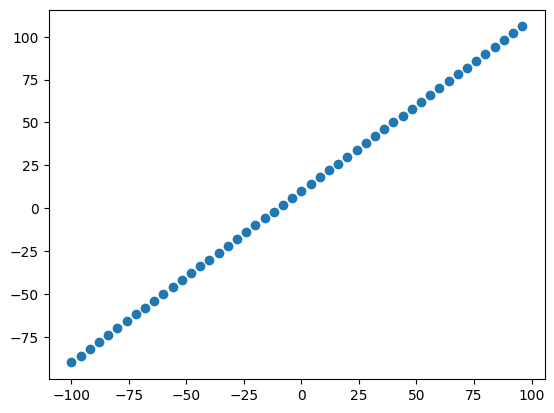

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X,y);

### The 3 sets...

* Training set - the model learns from thed ata, which is typically 70-80% of the total data yoy have available
* Validation set - the model gets turned on this data, which is typically 10-15% of the data available.
* Test data - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [7]:
# Check the length of how many samples we have
len(X)

50

In [8]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]
X_test  = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets... let's visualize it again!

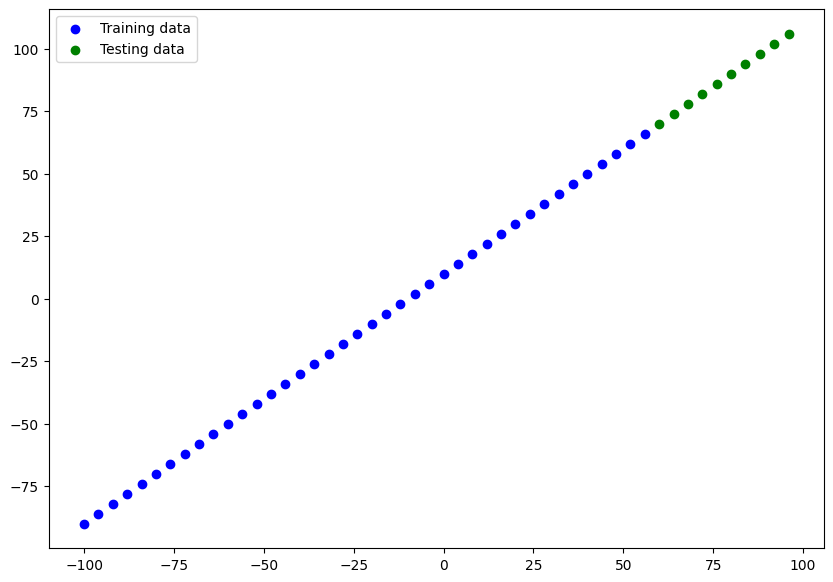

In [9]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data");
# Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data");
# Show a legend
plt.legend();

In [11]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]);

# 3. Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 11ms/step - loss: 40.8825 - mae: 40.8825
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 40.8787 - mae: 40.8787
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 40.8741 - mae: 40.8741
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 40.8688 - mae: 40.8688
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 40.8628 - mae: 40.8628
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 40.8562 - mae: 40.8562
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 40.8493 - mae: 40.8493
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 40.8398 - mae: 40.8398
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.8283 - mae: 40.8283
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 40.8150 - mae: 40.8150
Epoch 11/100
2/2 [==============================] - 0s 

In [12]:
# Visualizing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 100)               200       
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Let's create a model which build automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters  - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params -  these parameters aren't updates during training (this is typical when you bring in already learn or parameters from other model during **transfer learning**)


In [17]:
# Let's fit our model to training data
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=2);

Epoch 1/100
2/2 - 0s - loss: 9.0820 - mae: 9.0820 - 12ms/epoch - 6ms/step
Epoch 2/100
2/2 - 0s - loss: 5.9241 - mae: 5.9241 - 8ms/epoch - 4ms/step
Epoch 3/100
2/2 - 0s - loss: 8.9695 - mae: 8.9695 - 8ms/epoch - 4ms/step
Epoch 4/100
2/2 - 0s - loss: 12.3859 - mae: 12.3859 - 13ms/epoch - 7ms/step
Epoch 5/100
2/2 - 0s - loss: 11.3732 - mae: 11.3732 - 15ms/epoch - 8ms/step
Epoch 6/100
2/2 - 0s - loss: 8.9359 - mae: 8.9359 - 7ms/epoch - 3ms/step
Epoch 7/100
2/2 - 0s - loss: 7.0839 - mae: 7.0839 - 6ms/epoch - 3ms/step
Epoch 8/100
2/2 - 0s - loss: 9.3531 - mae: 9.3531 - 7ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 13.6997 - mae: 13.6997 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 7.4832 - mae: 7.4832 - 14ms/epoch - 7ms/step
Epoch 11/100
2/2 - 0s - loss: 6.6409 - mae: 6.6409 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 8.9807 - mae: 8.9807 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 7.9995 - mae: 7.9995 - 11ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - loss: 10.29

In [18]:
# Get a summary of our model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
